<a href="https://colab.research.google.com/github/ritaprova/Machile-learning-/blob/main/Project_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing usual tools 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Target variable : "Attrition"

#EDA

In [ ]:
#getting general idea nad looking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# looking at the top row 
df.iloc[0]

Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                            1
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime                        

In [ ]:
# looking at the distribution of the data 
pd.options.display.float_format = "{:.2f}".format
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


observations :
* "EmployeeCount" has all values as 1 . Can drop this column as there is little information here.
* "EmployeeNumber" is a sequential count . Can be dropped.
* "StandardHours" has all values as 80. Can be dropped as there is less information.

In [ ]:
# to identify the categorical columns
categorical_col = []
for label,content in df.items():
  if pd.api.types.is_string_dtype(content):
    categorical_col.append(label)

print(categorical_col)
# to get the numeric colums 
num_col = list(df.describe().columns) # using the describe function as it works on only the numeric data type anyway 

#now we need to remove the columns that we had wanted 
remove_col = ["EmployeeCount","EmployeeNumber","StandardHours"]
numeric_col = [e for e in num_col if e not in remove_col]

for item in numeric_col:
  print(item)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Age
DailyRate
DistanceFromHome
Education
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]), <a list of 23 Text major ticklabel objects>)

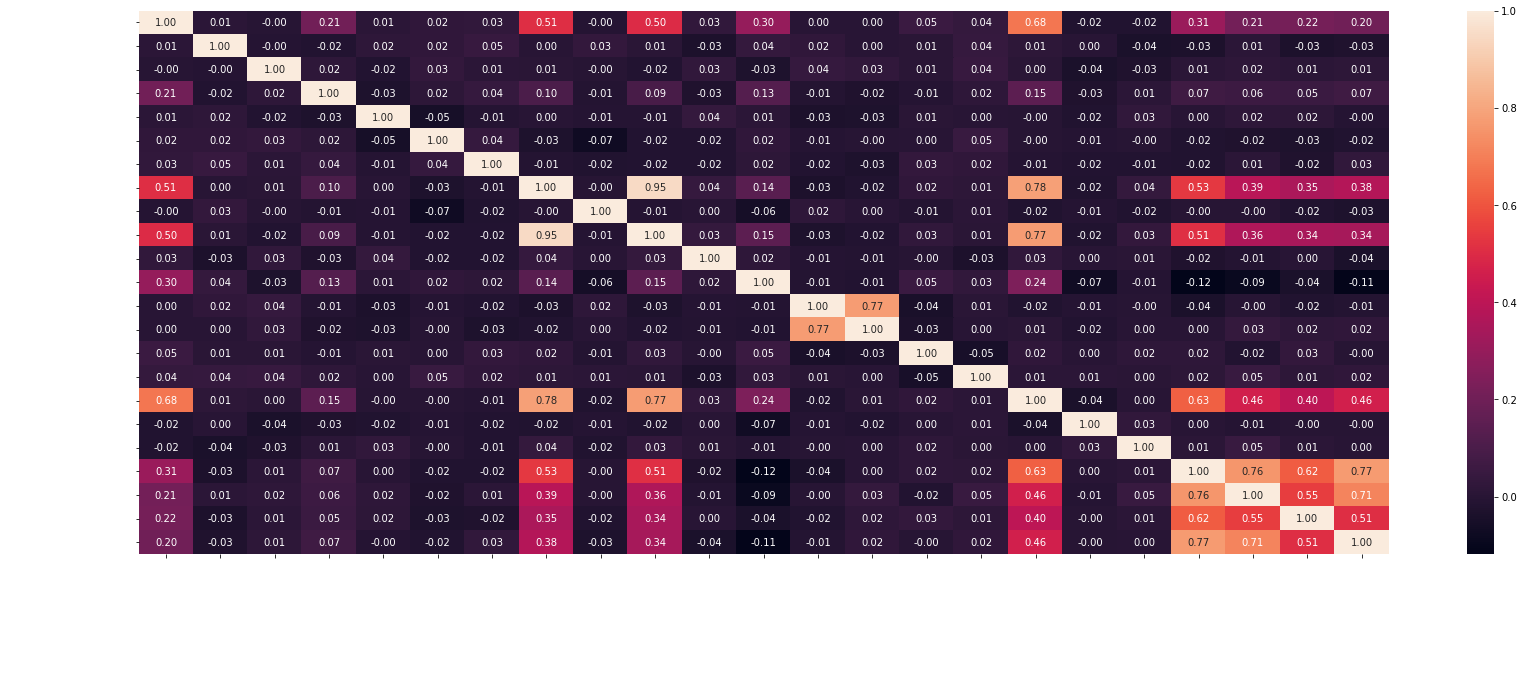

In [ ]:
#looking at the correlations among the data
corr_matrix = df[numeric_col].corr()

#translating it into a heat map 
plt.figure(figsize=(28,10))
sns.heatmap(corr_matrix,annot=True,fmt=".2f")
plt.yticks(color = "white")
plt.xticks(color = "white")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]), <a list of 23 Text major ticklabel objects>)

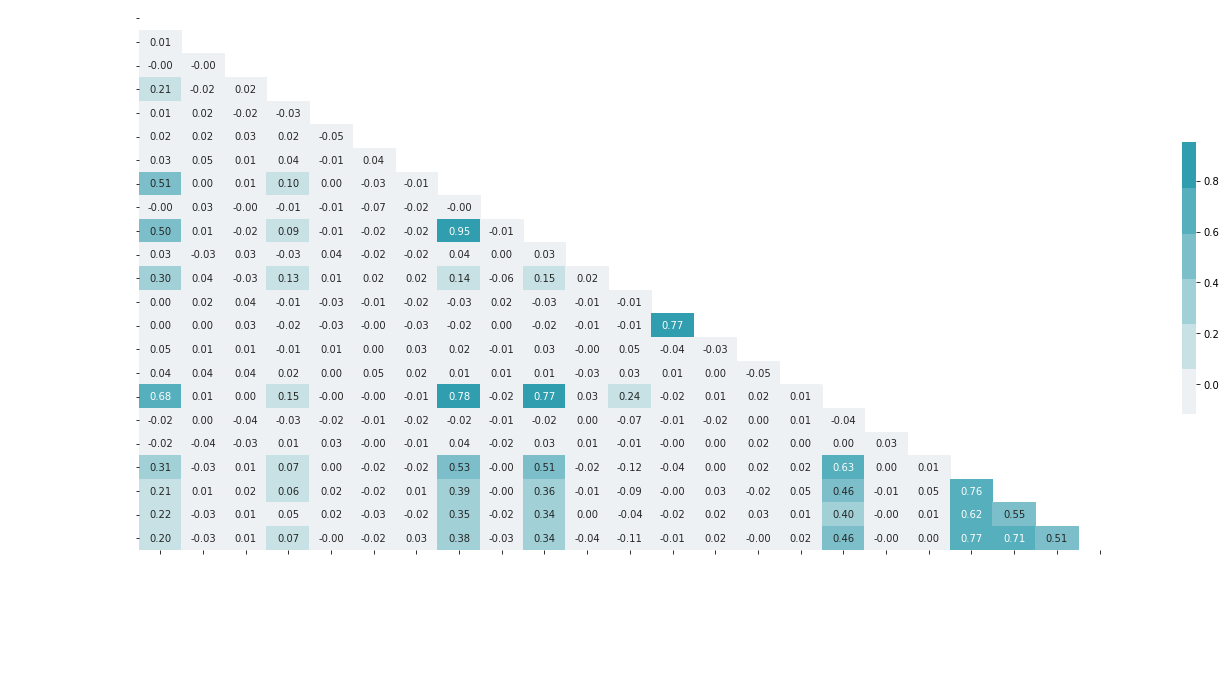

In [ ]:
# we can use a mask for the upper triangel 
plt.figure(figsize=(22,10))

#creating a mask for the upper triangle 
mask = np.zeros_like(corr_matrix ,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #np.triu_indices_from returns the indices from the upper triangle 

#generating a custom diverging color map 
cmap = sns.light_palette((210, 90, 60), input="husl")

#creating the heatmap with the mask and the correct aspect ratio 
sns.heatmap(corr_matrix,mask=mask,cmap = cmap,cbar_kws={"shrink": .5},annot =True,fmt=".2f")

plt.xticks(color ="white")
plt.yticks(color = "white")

Using any value greater than 0.7 as an indicator of the two associated variables being closely correlated .
Noted variables are:
* Montly income and Job level
* Total Working Years and Job Level
* Total Working Years and Monthly Income
* Performance Rating and Percentage Salary Hike
* Years in Current Role and Years at Company
* Years with Current Manager and Years at Company
* Years wit Current Manager and Years at Current Role

In [ ]:
categorical_col , df["Attrition"].unique()

(['Attrition',
  'BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime'],
 array(['Yes', 'No'], dtype=object))

1    1233
0     237
Name: Attrition_num, dtype: int64


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text major ticklabel objects>)

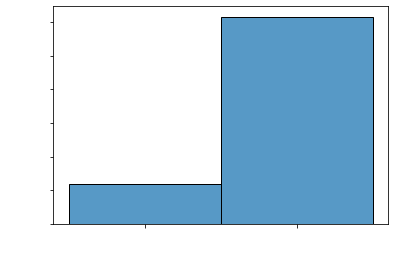

In [ ]:
#turning the target label to numeric type 
att_to_num = {
    "Yes" : 0,
    "No"  : 1,}

#mapping the dictionary to the df 
df["Attrition_num"] = df['Attrition'].map(att_to_num)
print(df["Attrition_num"].value_counts())

sns.histplot(df,x="Attrition",bins=10,binwidth=2,)
plt.xlabel("no of instances", color = "white")
plt.ylabel("attrition",color = "white")
plt.xticks(color = "white")
plt.yticks(color = "white")

In [ ]:
categorical_col.remove('Attrition')

In [ ]:
categorical_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [ ]:
# we will be one hot encoding the categorical colums and joining them with the numerical ones 
df_cat = pd.get_dummies(df[categorical_col])

#setting the features(Xs)
X = pd.concat([df[numeric_col],df_cat],axis=1)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


In [ ]:
Y = df["Attrition_num"]
Y.value_counts()

1    1233
0     237
Name: Attrition_num, dtype: int64

#Modelling

Thus the data has beet cleaned and made suitable for training purposes 

In [ ]:
#getting the test and training data 
np.random.seed(42)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 1097 to 1126
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1176 non-null   int64
 1   DailyRate                          1176 non-null   int64
 2   DistanceFromHome                   1176 non-null   int64
 3   Education                          1176 non-null   int64
 4   EnvironmentSatisfaction            1176 non-null   int64
 5   HourlyRate                         1176 non-null   int64
 6   JobInvolvement                     1176 non-null   int64
 7   JobLevel                           1176 non-null   int64
 8   JobSatisfaction                    1176 non-null   int64
 9   MonthlyIncome                      1176 non-null   int64
 10  MonthlyRate                        1176 non-null   int64
 11  NumCompaniesWorked                 1176 non-null   int64
 12  PercentSalaryHike

* Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
#using the measurement metrics 
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

#defining a function to print the ovel all score 
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
  '''
  v0.1 Follow the scikit learn library format in terms of input
  print the accuracy score, classification report and confusion matrix of classifier

  '''
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_train)

  if train:
    '''
    training performance
    '''
    res = clf1.predict(x_train)
    print("Train result:\n")
    print("accuracy score   : {:.4f}".format(accuracy_score(y_train,res)))
    print("Classification report : \n{}\n".format(classification_report(y_train,res)))
    print("confusion matrix :\n{}\n".format(confusion_matrix(y_train,res)))
    print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train),lb.transform(res))))
  
  #res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        #print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        #print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
  elif train==False:
    '''
    test performance
    '''
    res_test = clf.predict(x_test)
    print("Test Result:\n")        
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test,res_test)))
    print("Classification Report: \n {}\n".format(classification_report(y_test,res_test)))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test,res_test)))   
    print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test),lb.transform(res_test))))


In [ ]:
# calling the defined function 
print_score(clf1, x_train, x_test, y_train, y_test, train=True)
print_score(clf1, x_train, x_test, y_train, y_test, train=False)


Train result:

accuracy score   : 1.0000
Classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


confusion matrix :
[[198   0]
 [  0 978]]

ROC AUC: 1.0000

Test Result:

accuracy score: 0.7687

Classification Report: 
               precision    recall  f1-score   support

           0       0.19      0.23      0.21        39
           1       0.88      0.85      0.86       255

    accuracy                           0.77       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.79      0.77      0.78       294


Confusion Matrix: 
 [[  9  30]
 [ 38 217]]

ROC AUC: 0.5409

